# Animations

Compare two fastest laps by overlaying their speed traces.


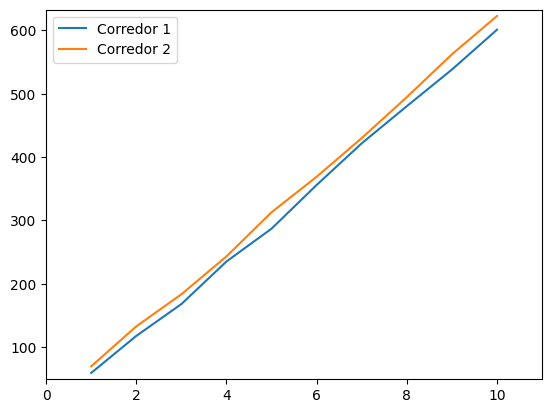

In [14]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import tkinter as tk
from PIL import Image, ImageTk
import random

# Generar datos de ejemplo
vueltas = np.arange(1, 11)  # 10 vueltas
tiempos_corredor_1 = np.random.uniform(low=50, high=70, size=10).cumsum()  # Simular tiempos acumulativos
tiempos_corredor_2 = np.random.uniform(low=50, high=70, size=10).cumsum()

fig, ax = plt.subplots()
ax.set(xlim=(0, 11), ylim=(np.min([tiempos_corredor_1, tiempos_corredor_2])-10, np.max([tiempos_corredor_1, tiempos_corredor_2])+10))
line1, = ax.plot([], [], label='Corredor 1')
line2, = ax.plot([], [], label='Corredor 2')
ax.legend()

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2,

def update(frame):
    line1.set_data(vueltas[:frame], tiempos_corredor_1[:frame])
    line2.set_data(vueltas[:frame], tiempos_corredor_2[:frame])
    return line1, line2,

ani = FuncAnimation(fig, update, frames=np.arange(1, len(vueltas)+1), init_func=init, blit=True)

# Para mostrar la animación en Jupyter
HTML(ani.to_jshtml())


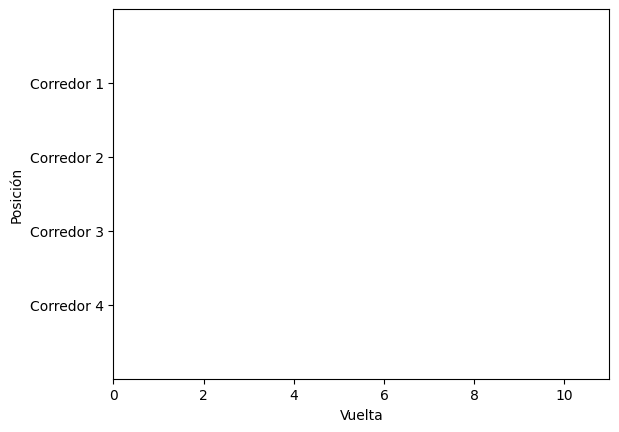

In [3]:


# Configuración inicial
vueltas = np.arange(1, 11)  # 10 vueltas
corredores = ['Corredor 1', 'Corredor 2', 'Corredor 3', 'Corredor 4']

# Generar datos de posición aleatorios para cada corredor en cada vuelta
# Las posiciones cambiarán aleatoriamente para simular el cambio de posiciones en la carrera
posiciones = np.random.randint(1, 5, (10, 4))

fig, ax = plt.subplots()
ax.set(xlim=(0, 11), ylim=(0, 5))
ax.set_xlabel('Vuelta')
ax.set_ylabel('Posición')
ax.set_yticks(np.arange(1, 5))
ax.set_yticklabels(corredores)
ax.invert_yaxis()  # Invertir para que la posición 1 esté arriba

lines = [ax.plot([], [], marker='o', linestyle='')[0] for _ in corredores]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def update(frame):
    for i, line in enumerate(lines):
        line.set_data(vueltas[:frame], posiciones[:frame, i])
    return lines

ani = FuncAnimation(fig, update, frames=np.arange(1, len(vueltas)+1), init_func=init, blit=False)

# Mostrar la animación en Jupyter
HTML(ani.to_jshtml())


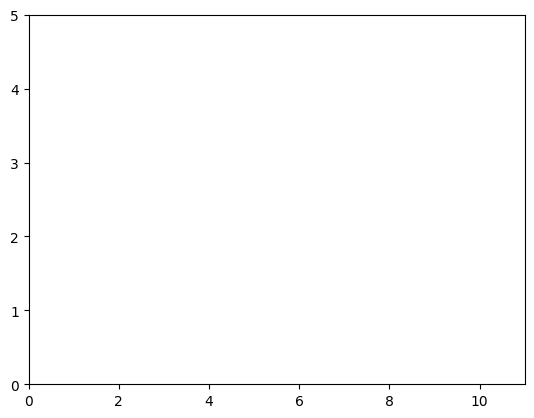

In [11]:

# Configuración inicial
vueltas = np.arange(1, 50)  # 10 vueltas
num_corredores = 4

# Generar posiciones_y como un arreglo bidimensional donde cada fila representa una vuelta
posiciones_y = np.random.randint(1, 5, size=(len(vueltas), num_corredores))

fig, ax = plt.subplots()
ax.set(xlim=(0, 11), ylim=(0, 5))
scatters = [ax.scatter([], [], s=1000) for _ in range(num_corredores)]  # Crear un scatter plot para cada corredor

def init():
    for scatter in scatters:
        scatter.set_offsets(np.empty((0, 2)))  # Inicializar con un arreglo vacío 2D
    return scatters

def update(frame):
    for i, scatter in enumerate(scatters):
        x = vueltas[frame]  # La posición x es el número de la vuelta
        y = posiciones_y[frame, i]  # La posición y es aleatoria para simular el cambio de posición
        scatter.set_offsets(np.array([[x, y]]))  # Pasar como arreglo 2D
    return scatters

ani = FuncAnimation(fig, update, frames=len(vueltas), init_func=init, blit=False)  # Cambié blit a False para evitar problemas de compatibilidad

# Mostrar la animación en Jupyter
HTML(ani.to_jshtml())


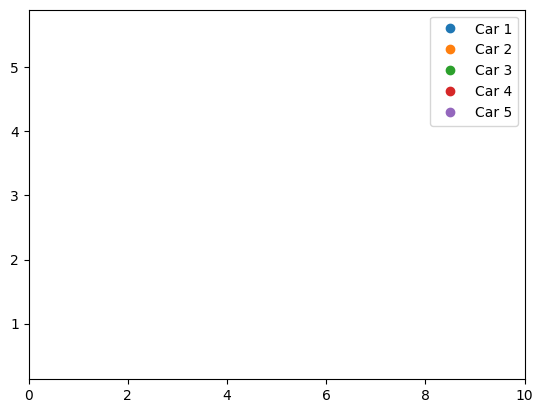

/var/folders/4j/1ys7d2fn53d_4v4hcn7y2f640000gn/T/ipykernel_11862/1369525308.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(frame, positions[i, frame])


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Simular datos de la carrera
# Esta sería una matriz donde cada fila representa un coche y las columnas son las posiciones en diferentes momentos.
positions = np.random.rand(5, 10).cumsum(axis=1)  # Datos simulados

# Inicializar la figura de matplotlib
fig, ax = plt.subplots()
lines = [ax.plot([], [], 'o', label=f'Car {i+1}')[0] for i in range(5)]

# Configuración de los ejes
ax.set_xlim(0, positions.shape[1])
ax.set_ylim(positions.min(), positions.max())
ax.legend()

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def update(frame):
    for i, line in enumerate(lines):
        line.set_data(frame, positions[i, frame])
    return lines

ani = FuncAnimation(fig, update, frames=positions.shape[1], init_func=init, blit=True)

plt.show()
# Mostrar la animación en Jupyter
HTML(ani.to_jshtml())


In [17]:


# Función para crear una ventana y canvas de Tkinter
def create_race_window():
    # Establece el número de coches y sus posiciones iniciales
    num_cars = 4
    car_positions = [0] * num_cars
    car_images = []  # Aquí irán las imágenes de los coches como objetos PhotoImage

    # Crear la ventana principal
    window = tk.Tk()
    window.title("F1 Race Simulation")

    # Configura el canvas para la animación
    canvas_width = 800
    canvas_height = 200
    race_canvas = tk.Canvas(window, width=canvas_width, height=canvas_height)
    race_canvas.pack()

    # Cargar imágenes y crear representaciones de coches en el canvas
    for i in range(num_cars):
        # Suponiendo que tienes las imágenes guardadas en la misma carpeta que el notebook
        # Usa la biblioteca Pillow para trabajar con imágenes
        img = Image.open(f'car{i+1}.png').resize((50, 30))  # Cambia el tamaño de la imagen
        car_image = ImageTk.PhotoImage(img)
        car_images.append(car_image)
        race_canvas.create_image(50, 30 + i * 40, image=car_image, tags=f'car{i}')

    def update_positions():
        # Simular cambios de posición
        for i in range(num_cars):
            car_positions[i] += random.randint(1, 5)  # Cambia el rango para variar la "velocidad"
            race_canvas.move(f'car{i}', car_positions[i], 0)

        # Reordenar los coches según la posición en la carrera
        sorted_positions = sorted(((pos, idx) for idx, pos in enumerate(car_positions)), reverse=True)
        for rank, (_, idx) in enumerate(sorted_positions):
            race_canvas.tag_raise(f'car{idx}')

        # Actualizar el canvas y repetir después de un corto retraso
        race_canvas.update()
        window.after(100, update_positions)

    # Iniciar la animación
    window.after(100, update_positions)
    window.mainloop()

# Llamar a la función para iniciar la simulación
create_race_window()


FileNotFoundError: [Errno 2] No such file or directory: 'car1.webp'